# Multiple Linear Regression (MLR)
This method uses multiple exploratory variables (x values) to predict the outcomes (y values). In short, is the extension of the SLR method for two or more independents variables.
One thing to keep in mind is that there are some assumptions of a LR model:
- Linearity
- Homoscedasticity (refers to a condition in which the variance of the residual, or error term, in a regression model is constant. That is, the error term does not vary much as the value of the predictor variable changes)
- Multivariate normality
- Independence of errors
- Lack of multicollinearity

- Variables: R&D Spend, Admin, Marketing, State, Profit
- Independent variables: R&D Spend, Admin, Marketing, State
- Dependent variables: Profit
    $$y = b_0 + b_1*x_1 + b_2*x_2 + b_3*x_3$$
    
$$ b_0 --> constant $$
$$ b_1*x_1 --> R and D Spend $$
$$ b_2*x_2 --> Admin $$
$$ b_3*x_3 --> Marketing $$

For the categorical variables, we transform those values to dummy values, in order to include this variables in a numerical model.
### Statistical significance
When we are working with a sample of a determined population, if the p-value of an observed effect is less than (or equal to) the significance level, an investigator may conclude that the effect reflects the characteristics of the whole population, thereby rejecting the null hypothesis.
Statistical significance plays a pivotal role in statistical hypothesis testing. It is used to determine whether the null hypothesis should be rejected or retained.

### Building the model
Methods:
#### 1 - All in

    - When you have a prior knowledge about what predictors are better for the model
    - When you have to use all of them for any reason
    - When you are preparing for Backward Elimination
#### 2 - Backward elimination

    - step 1: select a significance level
    - step 2: fit the full model with all posible predictors
    - step 3: consider the predictor with the highest p-value. If p>SL then go to step 4, if not, go to fin.
    - step 4: remove that predictor with the highest p-value
    - step 5: re-fit the model without this variable
#### 3 - Forward selection

    - step 1: select a significance level
    - step 2: fit all simple regression models y = x_n and select the one with the lowest p-value
    - step 3: Keep this variable and fit all possible models with one extra predictor added to the one(s) you already have.
    - step 4: Consider the predictor with the lowest p-value. If p<SL, go to step 3, otherwise go to fin (we keep the previous model, before p<SL)
#### 4 - Bidirectional elimination

    - Combines the backward and forward methods.
    - step 1: Select a SL to enter and to stay in the model. e.g.: SL-ENTER = 0.05 and SL-STAY = 0.05
    - step 2: Perform the next step of forward selection (new variables must have p<SL-ENTER to enter)
    - step 3: Perform all steps of backward elimination (old variables must have p<SL-STAY to stay)
    - step 4: now new variables can enter and no old variables can exit. Fin: the model is ready
#### 5 - Score comparison

    - step 1: select a criterion of goodness of fit (eg Akaike criterion)
    - step 2: construct all posible regression models: $$2-n - 1$$ total combinators
    - step 3: select the one with the best criterion. Then your model is ready
    eg: 10 columns, means 1023 models

### Importing the data and preprocessing step 

In [34]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable

In [35]:
# importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


([<matplotlib.axis.YTick at 0x7f297b8b5580>,
 [Text(0, 0, 'R&D Spend'),
  Text(0, 0, 'Administration'),
  Text(0, 0, 'Marketing Spend'),
  Text(0, 0, 'State'),
  Text(0, 0, 'Profit')])

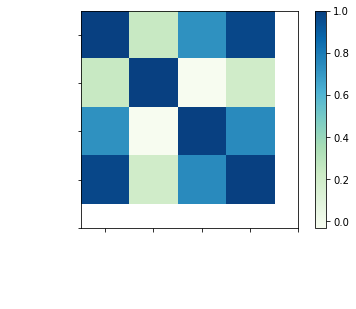

In [36]:
# Here we print out a heatmap to see if we can find out any correlation between the variables in our dataset
%matplotlib inline
plt.imshow(dataset.corr(), cmap=plt.cm.GnBu, interpolation='nearest', data=True)
plt.colorbar()
tick_marks = [i for i in range(len(dataset.columns))]
plt.xticks(tick_marks, dataset.columns, rotation=45, color = 'white')
plt.yticks(tick_marks, dataset.columns, rotation=45, color = 'white')


In [37]:
# This method allow us to tabulate our dataset
def generate_ascii_table(df):
    x = PrettyTable()
    x.field_names = df.columns.tolist()
    for row in df.values:
        x.add_row(row)
    print(x)
    return x

generate_ascii_table(dataset)

+-----------+----------------+-----------------+------------+-----------+
| R&D Spend | Administration | Marketing Spend |   State    |   Profit  |
+-----------+----------------+-----------------+------------+-----------+
|  165349.2 |    136897.8    |     471784.1    |  New York  | 192261.83 |
|  162597.7 |   151377.59    |    443898.53    | California | 191792.06 |
| 153441.51 |   101145.55    |    407934.54    |  Florida   | 191050.39 |
| 144372.41 |   118671.85    |    383199.62    |  New York  | 182901.99 |
| 142107.34 |    91391.77    |    366168.42    |  Florida   | 166187.94 |
|  131876.9 |    99814.71    |    362861.36    |  New York  | 156991.12 |
| 134615.46 |   147198.87    |    127716.82    | California | 156122.51 |
| 130298.13 |   145530.06    |    323876.68    |  Florida   |  155752.6 |
| 120542.52 |   148718.95    |    311613.29    |  New York  | 152211.77 |
| 123334.88 |   108679.17    |    304981.62    | California | 149759.96 |
| 101913.08 |   110594.11    |    2291

In [38]:
# Here we split our variables: x values by one side and y values on the other side.
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

print(x)
print('\n', y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

### Encoding categorical data
Once we have imported the data, we need to encode the categorical data (column "state"). For this task, we're going to use the One Hot Encoding technique

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# In this case we are applying the CT to the column 3
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [40]:
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

### splitting the data into training and test set

In [41]:
# We don't have neither, missing data nor NaN values, therefore we're going to split our data into train and test sets.
# first, we import the needed library
from sklearn.model_selection import train_test_split
# The recommended % for the training set is 80% and the remaining 20% for the test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Training the MLR model on the training set

In [42]:
# Importing the libraries
from sklearn.linear_model import LinearRegression
# then we create an object from LinearRegression
regressor = LinearRegression()
# here we fit our model
regressor.fit(x_train, y_train)

LinearRegression()

### Predicting the test results

In [43]:
# y_pred contains the predicted values of y (y_test contains the actual values of y)
y_pred = regressor.predict(x_test)
# number of significative decimals
np.set_printoptions(precision=3)
v1 = y_pred.reshape(len(y_pred),1) # reshape is for print in a horizontal shape
v2 = y_test.reshape(len(y_test),1)
print(np.concatenate((v1, v2), 1))

[[103015.202 103282.38 ]
 [132582.278 144259.4  ]
 [132447.738 146121.95 ]
 [ 71976.099  77798.83 ]
 [178537.482 191050.39 ]
 [116161.242 105008.31 ]
 [ 67851.692  81229.06 ]
 [ 98791.734  97483.56 ]
 [113969.435 110352.25 ]
 [167921.066 166187.94 ]]


In the first column are the predicted values of y and in the second column are the actual values of y (profit)